# PhD

## Mass Spectrometry Datasets: GNPS, HMDB, NIST and WILEY

### Exploration of dataset

Datasets: GNPS, HMDB, NIST, Wiley

-type of MS?

-what type of molecules are included?

-how representative is the dataset of what we would find in a real-world sample?

-what’s the average size?

-are there preferential sub-structures?

-what features are important to encode?

-what properties/figures influence the molecule fragmentation?

-preferential way of fragmenting?

-do they produce preferential motifs while fragmentating?

-could we define like a fragmentation tree?

-how are molecules represented traditionally?

In [1]:
f = open("hmdb/1.txt", "r")
print(f.read())

charge=0
crossvalidation_batch_index=3
dbsource=MassBank
exactmass=284.013474228
filename=1
formula=C10H9ClN4O2S
fpt_0=AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAQAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAACAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAABBaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAAAEEAYQAInmoipMExmEJmG+Ekhb4AEIkIIAAMAAAAkgBCSCBjBEmEQCACtAEBEYAEwIvigA

In [3]:
# print(f[0])

<_io.TextIOWrapper name='hmdb/1.txt' mode='r' encoding='UTF-8'>


## Reading HMDB

In [78]:
import os.path
from os import path

dbsource = {}
charge = {}
exactmass = []

for i in range(1, 11763):

    if path.exists('HMDB_MassBank/' + str(i) + '.txt'):

        with open('HMDB_MassBank/' + str(i) + '.txt', 'r') as file:
            data = file.read().split('\n')

        dbsource_value = data[2].split('=')[1]
        charge_value = data[0].split('=')[1]

        if not dbsource_value in dbsource.keys():
            dbsource[dbsource_value] = 0

        if not charge_value in charge.keys():
                    charge[charge_value] = 0

        exactmass.append(data[3].split('=')[1])

        dbsource[dbsource_value] = dbsource[dbsource_value] + 1
        charge[charge_value] = charge[charge_value] + 1

In [79]:
print(exactmass)
print(dbsource)
print(charge)

['284.013474228', '204.183778018', '162.04629857', '445.239729', '344.125988', '314.115423', '238.062994', '351.139448', '410.100853326', '298.084124', '298.084124', '268.073559', '376.199822006', '381.074304225', '326.079039', '284.104858', '254.094295', '254.094295', '344.125988', '252.078644', '302.095438', '284.104858', '298.120508', '314.115423', '314.115423', '387.030725161', '344.125988', '254.057909', '445.239729', '328.094688', '315.000723955', '314.115423', '328.094688', '286.047737', '254.057909', '300.099773', '300.099773', '284.104858', '444.255714', '298.084124', '314.115423', '314.115423', '314.115423', '328.094688', '328.094688', '298.084124', '284.104858', '60.032362758', '328.094688', '298.120508', '298.120508', '312.099773', '268.109945', '282.089209', '314.115423', '270.089209', '444.255714', '284.104858', '268.109945', '256.073559', '312.099773', '286.047737', '463.951379308', '270.052824', '270.052824', '443.29685', '374.282095', '434.210466932', '288.078644', '29

## Data Visualization

Dataset Distribution

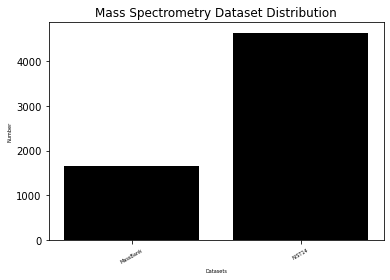

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_x(data):
    # this is for plotting purpose
    index = np.arange(len(data.keys()))
    plt.bar(index, data.values(), color = "black")
    plt.xlabel('Datasets', fontsize=5)
    plt.ylabel('Number', fontsize=5)
    plt.xticks(index, data.keys(), fontsize=5, rotation=30)
    plt.title('Mass Spectrometry Dataset Distribution')
    plt.show()

plot_bar_x(dbsource)

Charge Distribution

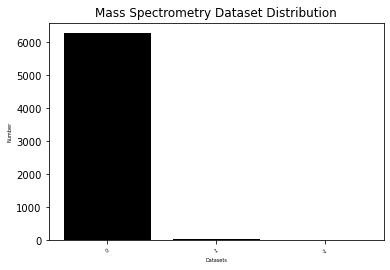

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plot_bar_x(charge)

Mass Distribution

/Users/luisrita/anaconda3/envs/FoodReco/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number')

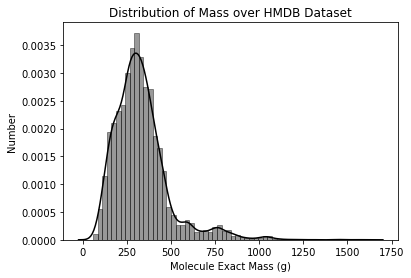

In [43]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn histogram
sns.distplot(exactmass, hist=True, kde=True,
             bins=int(180/3), color = 'black',
             hist_kws={'edgecolor':'black'})


# Add labels
plt.title('Distribution of Mass over HMDB Dataset')
plt.xlabel('Molecule Exact Mass (g)')
plt.ylabel('Number')

Spectrum

In [74]:

import os.path
from os import path

spectrum = {}

for i in range(1, 10):

    peak_number = 0

    if path.exists('HMDB_MassBank/' + str(i) + '.txt'):

        with open('HMDB_MassBank/' + str(i) + '.txt', 'r') as file:
            data = file.read().split('\n')

        #dbsource_value = data[11].split('=')[1]

        for j in range(1, len(data)):

            # print(data[j])

            if data[j].strip() == "peaks":

                peak_number = peak_number + 1

            if peak_number == 2 and data[j].strip().split(',') != "peaks":

                print(data[j].strip().split(','))

                #if not data[j].strip().split(',')[1] in spectrum.keys():

                    #spectrum[data[j].strip().split(',')[1]] = 0

                #spectrum[data[j].strip().split(',')[1]] = data[j].strip().split(',')[2]

print(spectrum)

['peaks']
['0', '53.0389', '0.00342156976072']
['1', '54.0333', '0.00325973875853']
['2', '55.0178', '0.00300543289793']
['3', '60.0552', '0.00312102647093']
['4', '65.0382', '0.0219858975841']
['5', '66.0423', '0.00291295803953']
['6', '68.049', '0.0457981736215']
['7', '78.0333', '0.0041844873425']
['8', '79.0177', '0.00608022193966']
['9', '92.0498', '0.0442954571726']
['10', '93.0532', '0.0042076060571']
['11', '96.0443', '0.00358340076292']
['12', '108.0457', '0.0700034678072']
['13', '109.0483', '0.00679690209224']
['14', '110.0609', '0.0282048318114']
['15', '120.0562', '0.0178014102416']
['16', '130.0172', '0.0325280314415']
['17', '132.0138', '0.008715755404']
['18', '156.0118', '0.575101144376']
['19', '157.015', '0.0510923592648']
['20', '158.008', '0.0223789157323']
['21', '174.0228', '0.0043231996301']
['22', '184.0757', '0.00356028204832']
['23', '191.9647', '0.00339845104612']
['24', '219.0438', '0.0041613686279']
['25', '285.0221', '0.0212460987169']
['26', '287.0184', 